In [9]:
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
import os
import random
import time

from sklearn.model_selection import train_test_split

In [38]:
image_size = 256

labels = ['1_NORMAL', '2_BACTERIA','3_VIRUS']

def create_training_data(paths):
    
    images = []
    
    for label in labels:
        dir = os.path.join(paths,label)
        class_num = labels.index(label)
        
        for image in os.listdir(dir):
            image_read = cv.imread(os.path.join(dir,image))
            image_resized = cv.resize(image_read,(image_size,image_size),cv.IMREAD_GRAYSCALE)
            images.append([image_resized,class_num])
            
    return np.array(images)

In [3]:
train = create_training_data('D:/Kaggle datasets/chest_xray_tf/train')

In [4]:
train.shape

(5706, 2)

In [7]:
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)
    
X= np.array(X)
y = np.array(y)
y = np.expand_dims(y, axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 32, stratify=y1)

Number of Normal images = 1226
Number of Bacteria images = 2184
Number of Virus images = 1154


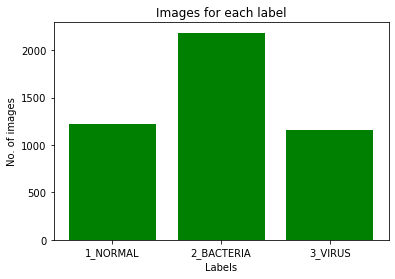

In [40]:
# checking the number of images of each class

a = 0
b = 0
c = 0

for label in y_train:
    if label == 0:
        a += 1
    if label == 1:
        b += 1
    if label == 2:
        c += 1
        
print (f'Number of Normal images = {a}')
print (f'Number of Bacteria images = {b}')
print (f'Number of Virus images = {c}')

# plotting the data

xe = [i for i, _ in enumerate(labels)]

numbers = [a,b,c]
plt.bar(xe,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(xe, labels)

plt.show()

In [42]:
difference_normal = b-a
difference_virus = b-c

print(difference_normal)
print(difference_virus)

958
1030


In [44]:
def rotate_images(image, scale =1.0, h=256, w = 256):
    
    center = (h/2,w/2)
    
    angle = random.randint(-25,25)
    M = cv.getRotationMatrix2D(center, angle, scale)
    rotated = cv.warpAffine(image, M, (h,w))
    return rotated

def flip (image):
    
    flipped = np.fliplr(image)
    return flipped

def translation (image):
    
    x= random.randint(-50,50)
    y = random.randint(-50,50)
    rows,cols,z = image.shape
    M = np.float32([[1,0,x],[0,1,y]])
    translate = cv.warpAffine(image,M,(cols,rows))
    
    return translate

def blur (image):
    
    x = random.randrange(1,5,2)
    blur = cv.GaussianBlur(image,(x,x),cv.BORDER_DEFAULT)
    return blur

In [45]:
def apply_aug (image):
    
    number = random.randint(1,4)
    
    if number == 1:
        image= rotate_images(image, scale =1.0, h=256, w = 256)
            
    if number == 2:
        image= flip(image)
                
    if number ==3:
        image= translation(image)
                
    if number ==4:
        image= blur(image)
    
    return image

In [49]:
def oversample_images (difference_normal,difference_virus, X_train, y_train):
    
    normal_counter = 0
    virus_counter= 0
    new_normal = []
    new_virus = []
    label_normal = []
    label_virus = []
    
    for i,item in enumerate (X_train):
        
        if y_train[i] == 0 and normal_counter < difference_normal:
            
            image = apply_aug(item)
            
            normal_counter = normal_counter+1
            label = 0
            
            new_normal.append(image)
            label_normal.append(label)
            
            
        if y_train[i] == 2 and virus_counter < difference_virus:
            
            image = apply_aug(item)
            
            virus_counter = virus_counter+1
            label =2
            
            new_virus.append(image)
            label_virus.append(label)
            
    
    new_normal = np.array(new_normal)
    label_normal = np.array(label_normal)
    new_virus= np.array(new_virus)
    label_virus = np.array(label_virus)
    
    return new_normal, label_normal, new_virus, label_virus          

In [50]:
n_images,n_labels,v_images,v_labels =oversample_images(difference_normal,difference_virus,X_train,y_train) 

In [51]:
print(n_images.shape)
print(n_labels.shape)
print(v_images.shape)
print(v_labels.shape)

(958, 256, 256, 3)
(958,)
(1030, 256, 256, 3)
(1030,)


Display Random Images


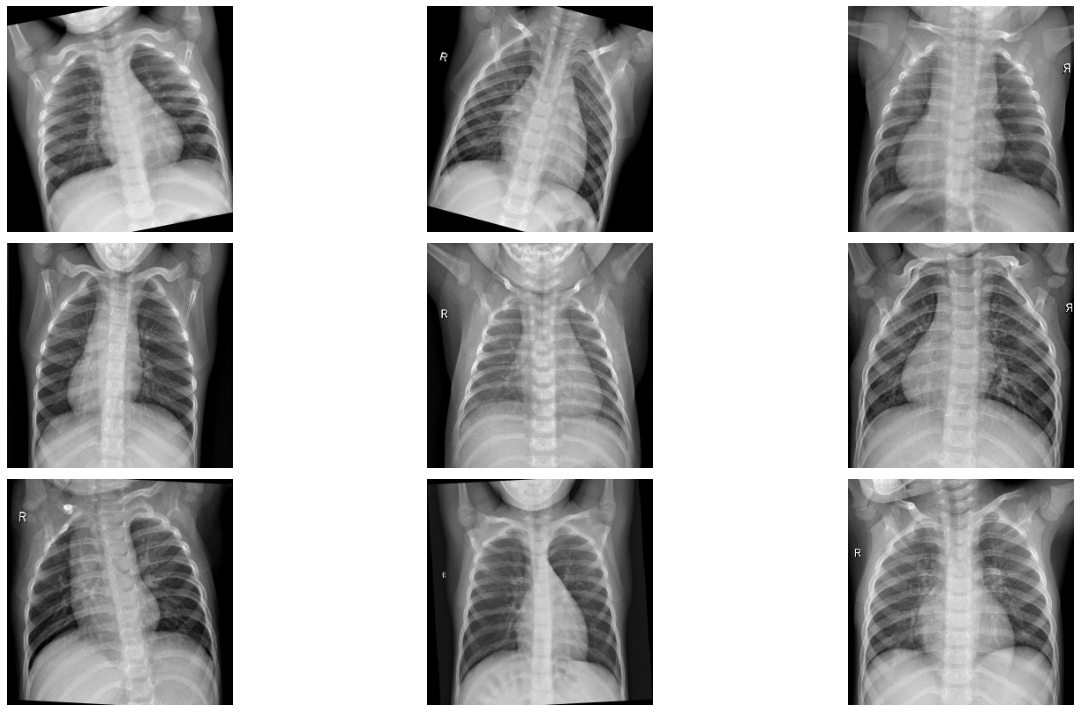

In [54]:
# Displays 9 generated bacterial images 
# Extract 9 random images
print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

for i in range(9):
    num = random.randint(0,len(n_images)-1)
    plt.subplot(3, 3, i + 1)
    
    plt.imshow(n_images[num],cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()

Display Random Images


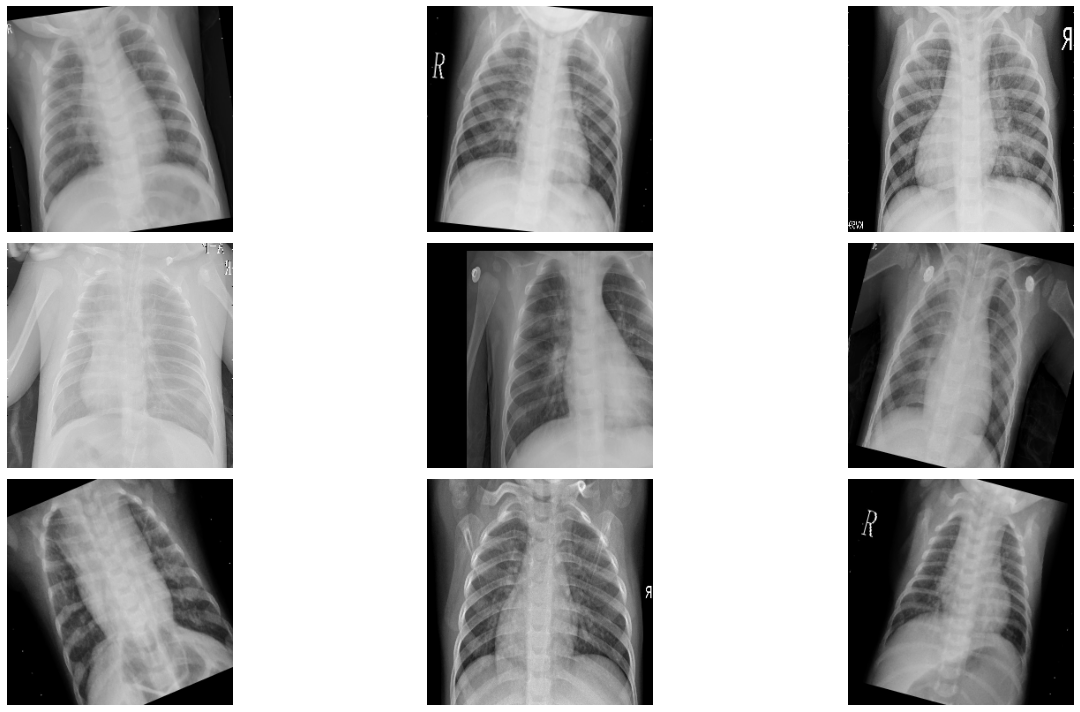

In [55]:
# Displays 9 generated viral images 
# Extract 9 random images
print('Display Random Images')

# Adjust the size of your images
plt.figure(figsize=(20,10))

for i in range(9):
    num = random.randint(0,len(v_images)-1)
    plt.subplot(3, 3, i + 1)
    
    plt.imshow(v_images[num],cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()

In [56]:
new_labels = np.append(n_labels,v_labels)
y_new_labels = np.expand_dims(new_labels, axis=1)
x_new_images = np.append(n_images,v_images,axis=0)

X_train1 = np.append(X_train,x_new_images,axis=0)
y_train1 = np.append(y_train,y_new_labels)

print(X_train1.shape)
print(y_train1.shape)

(6552, 256, 256, 3)
(6552,)


Number of Normal images = 2184
Number of Bacteria images =  2184
Number of Virus images = 2184


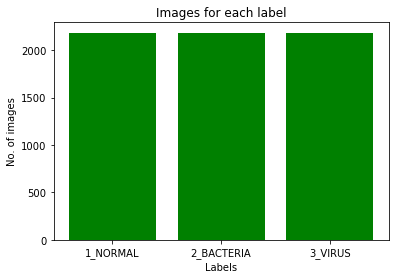

In [58]:
bacteria_new=0
virus_new=0
normal_new =0

for i in y_train1:
    
    if i==0:
        normal_new = normal_new+1
    elif i==1 :
        bacteria_new = bacteria_new+1
    else:
        virus_new=virus_new+1    
        
print ('Number of Normal images =',normal_new)
print ('Number of Bacteria images = ',bacteria_new)
print ('Number of Virus images =',virus_new)

# plotting the data

xe = [i for i, _ in enumerate(labels)]

numbers = [normal_new, bacteria_new, virus_new]
plt.bar(xe,numbers,color = 'green')
plt.xlabel("Labels")
plt.ylabel("No. of images")
plt.title("Images for each label")

plt.xticks(xe, labels)

plt.show()